### **使用支持向量回归（SVR）预测加州地区的房屋中位数价格**
### 一、算法介绍

支持向量回归（SVR）是一种监督学习算法，用于解决回归问题。其核心思想是找到一个超平面，这个超平面能够以最小的误差包含所有的训练样本。与支持向量机处理分类问题类似，支持向量回归的目标是确保尽可能多的数据点位于由超平面决定的边界内。

### 二、算法原理

#### 2.1 基本思想

SVR的目标是找到一个函数 $f(x)$，使得该函数在整个数据集上的偏差最小，并且同时保证模型的复杂度较低，以提高模型的泛化能力。在实现上，这通常通过引入所谓的“软间隔”来实现，允许某些数据点可以处于误差允许的范围之外，从而达到更好的预测效果。

#### 2.2 数学模型

在支持向量回归中，我们试图找到一个线性函数 $f(x) = wx + b$，其中 $w$ 是权重向量，$b$ 是偏置。我们希望大部分的数据点 $(x_i, y_i)$ 都满足 $|y_i - f(x_i)| \leq \epsilon$，这里的 $\epsilon$ 是预先设定的一个小的非负数，表示容忍的误差范围。

为了找到这样的函数，我们需要解决以下优化问题：

$$
\min_{w, b} \frac{1}{2} \|w\|^2 + C \sum_{i=1}^n (\xi_i + \xi_i^*)
$$

其中，$\xi_i$ 和 $\xi_i^*$ 是松弛变量，用于处理不在误差范围内的数据点，$C$ 是正则化参数，用于控制模型复杂度和误差之间的平衡。

#### 2.3 核技巧

在实际应用中，很多问题的数据分布可能是非线性的，直接使用线性函数进行回归可能无法达到较好的效果。SVR通过引入核函数来解决这一问题。核函数可以将数据映射到一个高维空间，在这个高维空间中，原本线性不可分的数据可能变得线性可分。常见的核函数包括线性核、多项式核、径向基函数（RBF）核等。

### 三、案例分析

为了进一步理解支持向量回归（SVR）的应用，我们将使用加州房价数据集进行模型训练和测试。加州房价数据集包含以下特征：

- **MedInc**：收入中位数
- **HouseAge**：房屋年龄的中位数
- **AveRooms**：平均房间数目
- **AveBedrms**：平均卧室数目
- **Population**：区域人口
- **AveOccup**：平均入住率
- **Latitude**：纬度
- **Longitude**：经度

数据集的目标变量为**MedHouseVal**，即房屋价值的中位数（单位为$100,000）。


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# 加载数据
california = fetch_california_housing()
X = pd.DataFrame(california.data, columns=california.feature_names)
y = california.target
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


Mean Squared Error: 0.3551984619989417


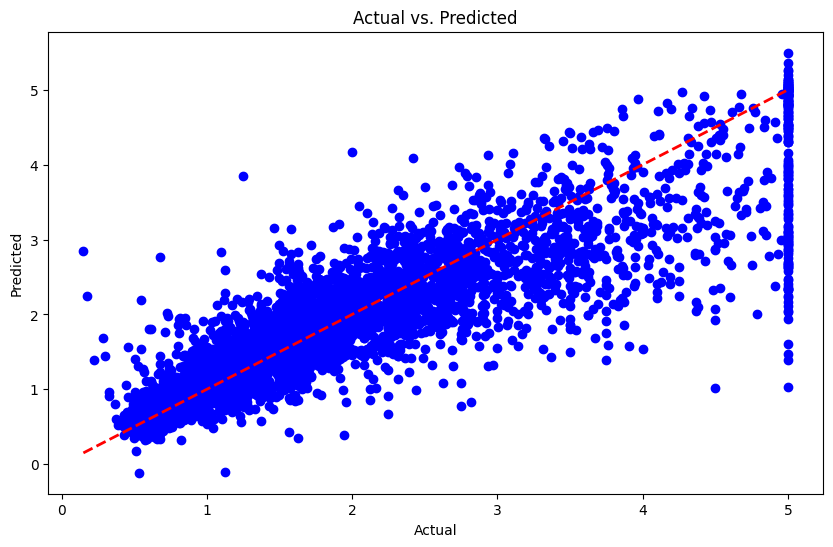

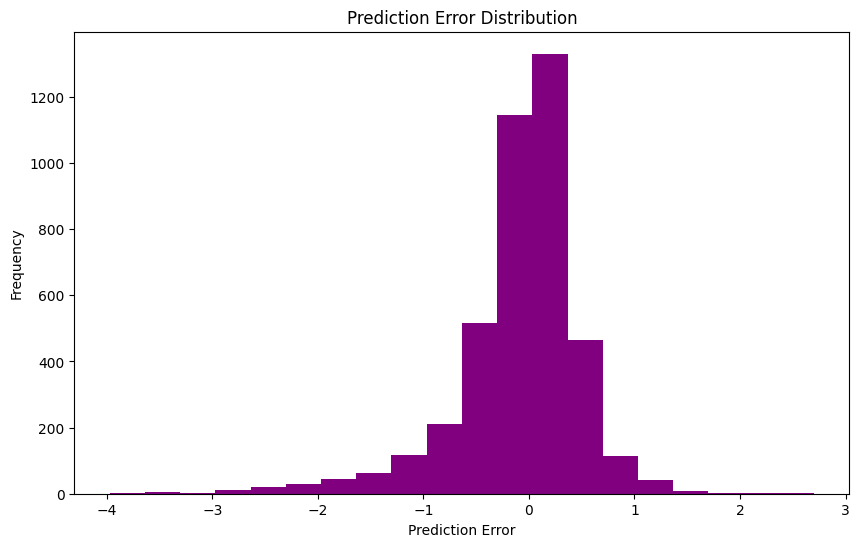

In [2]:
# 数据预处理
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 创建SVR模型
svr = SVR(kernel='rbf')

# 训练模型
svr.fit(X_train, y_train)

# 预测测试集
y_pred = svr.predict(X_test)

# 计算MSE
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# 可视化实际值与预测值
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()

# 可视化误差分布
errors = y_pred - y_test
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=20, color='purple')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('Prediction Error Distribution')
plt.show()